In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.functional_models import AiryDisk2D

# Optics

<div class="alert alert-block alert-success">
    <b> Key Question </b>

What's the minium distance between two objects which can individually resolved?
</div>

## Fraunhofer diffraction

Recall from your optics lecture that a wave with wavelength $\lambda$ which passes through a slit of width $a$, where $a$>>$\lambda$, will produce a pattern given by:
$$
    I = I_0 \frac{\sin^2(\frac{\pi a \sin(\theta)}{\lambda})}{\left[\frac{\pi a \sin(\theta)}{\lambda}\right]^2}
$$
This is shown in the below figure. This pattern has a minima at $\sin\theta=\frac{m\lambda}{a}$ where m is an integer

![SingleSlit](Images/Single_Slit.svg)

If the slit is 2 dimensional, like the aperture of a telescope, then the pattern produce is this function rotated around it's axis, and is called an Airy Disc. In this case, the difference between the minima can still be given by $\sin\theta=\frac{m\lambda}{a}$, but m is no longer integer. The first minimum occurs when $m=1.22$ (the derivation is tough and beyond the scope of this current module).

![AiryDisc](Images/Airy_discs.png)

So, if we have 2 sources in our image, they will both produce Airy Discs. In order to not have their primary peaks overlapping, we want their angular separation to be:
$$
\sin\theta>\frac{1.22\lambda}{a}
$$
or, for small angles
$$
\theta>\frac{1.22\lambda}{a}.
$$
This is the Rayleigh criteria, and is very important when considering what wavelength to observer your source at.

<div class="alert alert-block alert-info">
    <b>Example: A 10m optical telescope</b>

For a 10m aperture optical telescope (observing at $\lambda=500$Å) we find that
    
$$
    \theta=\frac{1.22 0.5\mu m}{10m}=0.01{\rm''}
$$

Again, this is much smaller than the seeing we're used because of Earth's atmosphere. As such, it makes sense to put optical telescopes into space where they can make 
full use of their resolution.
</div>

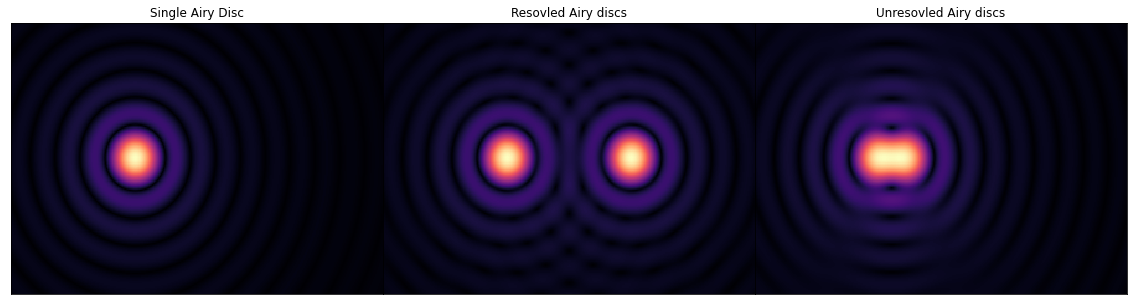

In [53]:
x = np.arange(-5,10,0.05)
y = np.arange(-5,5,0.05)
X, Y = np.meshgrid(x, y)
disc_func = AiryDisk2D()
z1 = disc_func.evaluate(X,Y,amplitude=1,x_0=0,y_0=0,radius=1.22)
z2 = disc_func.evaluate(X,Y,amplitude=1,x_0=5,y_0=0,radius=1.22)
z3 = disc_func.evaluate(X,Y,amplitude=1,x_0=1,y_0=0,radius=1.22)

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=[20,5])
ax[0].pcolormesh(x,y,z1**0.4,cmap='magma') 
ax[1].pcolormesh(x,y,(z1+z2)**0.4,cmap='magma') 
ax[2].pcolormesh(x,y,(z1+z3)**0.4,cmap='magma')

for axs in ax:
    axs.set_xticks([])
    axs.set_yticks([])
ax[0].set_title("Single Airy Disc")
ax[1].set_title("Resovled Airy discs")
ax[2].set_title("Unresovled Airy discs")
plt.subplots_adjust(wspace=0)
plt.savefig("Images/Airy_discs.png")
plt.show()